### Importando pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### Importando base de dados

In [2]:
df = pd.read_csv('df_desafio_prático_multidisciplinar_1.csv', index_col=0)
df

,Altura,Peso,IMC,Sexo,Cardíaco
0,1.947519,101.286002,26.70,F,N
1,1.622242,85.781056,32.60,F,P
2,1.954190,103.836279,27.19,M,N
3,1.293427,72.765060,43.49,F,S
4,1.698642,88.736652,30.75,M,P
...,...,...,...,...,...
2995,1.277332,69.795914,42.78,F,S
2996,1.976566,102.064567,26.12,F,N
2997,1.678684,92.448946,32.81,F,P
2998,1.576926,79.624027,32.02,M,P


### Criando dois conjuntos de dados em dois grupos: com problemas cardíacos e com problemas cardíacos

In [3]:
lista_problemas_cardiacos = []
lista_sem_problemas_cardiacos = []

for IMC, cardiaco in zip(df.IMC, df.Cardíaco):
    if cardiaco == 'S':
        lista_problemas_cardiacos.append(IMC)
    elif cardiaco == 'N':
        lista_sem_problemas_cardiacos.append(IMC)


### Visualizando 20 primeiros elementos do conjunto de pessoas: com problemas cardíacos e sem problemas cardíacos

In [4]:
print(lista_problemas_cardiacos[0:20])
print(lista_sem_problemas_cardiacos[0:20])

[43.49, 40.02, 40.89, 44.61, 51.09, 65.91, 43.54, 46.2, 42.8, 40.36, 40.25, 42.4, 47.99, 40.84, 68.63, 46.63, 41.22, 55.71, 57.33, 43.08]
[26.7, 27.19, 24.01, 23.73, 23.16, 27.59, 29.68, 28.34, 25.84, 26.8, 24.4, 27.55, 29.72, 29.16, 28.07, 25.15, 28.89, 26.74, 26.36, 27.86]


### Criando função média, mediana e desvio padrão

In [5]:
#Criando função média
def media(coluna):
    return sum(coluna) / len(coluna)

#Craindo função mediana

def mediana(coluna):
    if len(coluna) % 2 == 0:
        return coluna[len(coluna)/2]

import math
# Criando função mediana
def mediana(coluna):
    coluna = sorted(coluna)
    if len(coluna) % 2 == 0:
        
        
        return coluna[int(len(coluna) / 2)]

    valor_min = math.floor(len(coluna) / 2)
    valor_max = math.floor(len(coluna) / 2) + 1

    return coluna[int((valor_min+valor_max) / 2)]


# Criando função desvio padrão
def desvio_padrao(coluna):
    medi = media(coluna)

    soma = 0

    for valor in coluna:
        soma += (valor - medi)**2

    desvio_padrao = math.sqrt(soma / (len(coluna) - 1))
    return round( desvio_padrao, 2)


    

### Calculando a média para pessoas: com problemas cardíacos e sem problemas cardíacos

In [6]:
media_problemas_cardiacos = media(lista_problemas_cardiacos)
media_sem_problemas_cardiacos = media(lista_sem_problemas_cardiacos)

print(f"Média do IMC de pessoas com problemas cardíacos: {round(media_problemas_cardiacos, 2)}")
print(f"Média do IMC de pessoas com sem problemas cardíacos: {round(media_sem_problemas_cardiacos, 2)}")

Média do IMC de pessoas com problemas cardíacos: 45.14
Média do IMC de pessoas com sem problemas cardíacos: 27.27


### Calculando a mediana para pessoas: com problemas cardíacos e sem problemas cardíacos

In [7]:
mediana_problemas_cardiacos = mediana(lista_problemas_cardiacos)
mediana_sem_problemas_cardiacos = mediana(lista_sem_problemas_cardiacos)

print(f"Mediana do IMC de pessoas com problemas cardíacos: {round(mediana_problemas_cardiacos, 2)}")
print(f"Mediana do IMC de pessoas com sem problemas cardíacos: {round(mediana_sem_problemas_cardiacos, 2)}")

Mediana do IMC de pessoas com problemas cardíacos: 43.5
Mediana do IMC de pessoas com sem problemas cardíacos: 27.62


### Calculando o desvio padrão para pessoas: com problemas cardíacos e sem problemas cardíacos

In [8]:
dp_problemas_cardiacos = desvio_padrao(lista_problemas_cardiacos)
dp_sem_problemas_cardiacos = desvio_padrao(lista_sem_problemas_cardiacos)

print(f"Desvio padrão do IMC de pessoas com problemas cardíacos: {round(dp_problemas_cardiacos, 2)}")
print(f"Desvio padrão do IMC de pessoas com sem problemas cardíacos: {round(dp_sem_problemas_cardiacos, 2)}")

Desvio padrão do IMC de pessoas com problemas cardíacos: 5.4
Desvio padrão do IMC de pessoas com sem problemas cardíacos: 2.01


### Gerando gráficos bloxplot para pessoas: com problemas cardíacos e sem problemas cardíacos

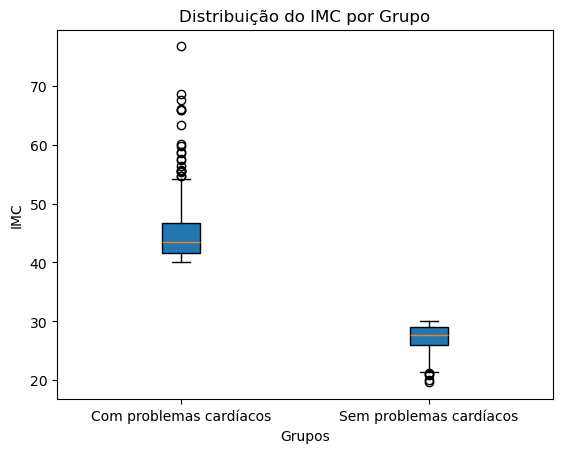

In [15]:
plt.boxplot([lista_problemas_cardiacos, lista_sem_problemas_cardiacos], 
            patch_artist=True, 
            tick_labels=["Com problemas cardíacos", "Sem problemas cardíacos"])
plt.title("Distribuição do IMC por Grupo")
plt.xlabel("Grupos")
plt.ylabel("IMC")
plt.savefig("boxplot_distribuição_do_IMC_por_grupos.png", dpi = 300, bbox_inches="tight")
plt.show()

### Gerando histograma da distribuição dos IMCs

In [10]:
import seaborn as sns

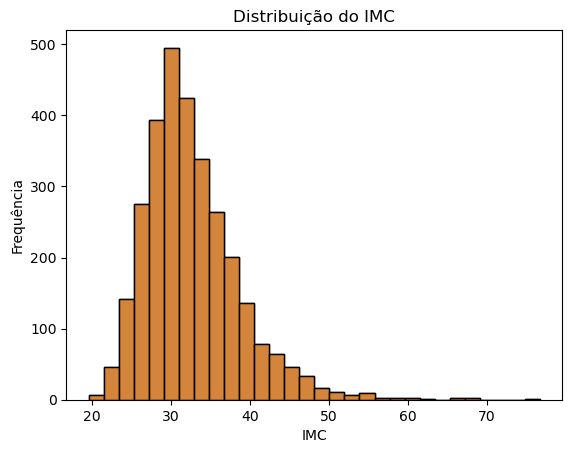

In [16]:
#Calculando número de classes para obter a quantidade de bins no gráfico
k = 2 * math.ceil(len(df['IMC'])**(1/3))
sns.histplot(df['IMC'], bins = k)
sns.histplot(df['IMC'], bins=k)

plt.title("Distribuição do IMC")
plt.xlabel("IMC")
plt.ylabel("Frequência")

# Salvando o gráfico no PC
plt.savefig("histograma_imc.png", dpi=300, bbox_inches="tight")

plt.show()
